In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))
pd.set_option("display.max_columns", 45)

In [2]:
df = pd.read_csv('Data/datas0402.csv')

```python
# 경험 

d['경험'] = None
data = []
for name in d['이름']:
    for x in d[d['이름'] == name]['시즌'] :
        a = d[d['이름'] == name]['시즌'] = x - d[d['이름'] == name]['시즌'].min()
        d['경험'][(d['이름'] == name) & (d['시즌'] == x)] = a

d['횟수'] = 1
for id_x in d.ID.unique():
    d["횟수"].loc[d[d["ID"] == id_x].reset_index()["index"]] = list(d[d["ID"] == id_x].reset_index().reset_index()["level_0"] + 1)
```

In [3]:
train = df[df.시즌 <= 2017]
test = df[df.시즌 == 2018]

In [4]:
import re
names = df.이름.unique()
df['외국인'] = None
for name in names:
    if re.findall('[에, 브, 워, 대, 피, 히, 버, 러, 칸, 루, 필, 파, 스, 아,마, 가, 초, 모, 로, 발, 번, 테, 호]', name[0]):
        df['외국인'][df['이름'] == name] = 1
    else:
        df['외국인'][df['이름'] == name] = 0

In [5]:
df['BABIP'] = (df['안타'] - df['홈런'])/(df['타수'] - df['삼진']-df['홈런'] - df['희비'])

In [6]:
a = ['나바로', '조쉬벨', '고메즈']
for name in a:
    df['외국인'][df['이름'] == name] = 1

In [7]:
df['이적'] = None
for x in df['이름']:
    df['이적'][df['이름'] == x] = len(df[df['이름'] == x]['팀'].unique())

In [8]:
df['이적C'] = df.이적.apply(lambda x: 0 if x == 1 else x)
df['이적C'] = df.이적C.apply(lambda x: 1 if x == 2 else x)
df['이적C'] = df.이적C.apply(lambda x: 2 if x == 3 else x)
df['이적C'] = df.이적C.apply(lambda x: 3 if x >= 3 else x)

In [9]:
df.이적C.unique()

array([0, 2, 1, 3])

In [10]:
df['나이C'] = df.나이.apply(lambda x: 0 if x <= 23 else x)
df['나이C'] = df.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
df['나이C'] = df.나이C.apply(lambda x: 2 if 33 >= x > 26 else x)
df['나이C'] = df.나이C.apply(lambda x: 3 if 37 >= x > 33 else x)
df['나이C'] = df.나이C.apply(lambda x: 4 if 40 >= x > 37 else x)
df['나이C'] = df.나이C.apply(lambda x: 5 if x >= 40 else x)

In [11]:
df.groupby('시즌').median()['연봉']

시즌
2010    17750.0
2011    20000.0
2012    20000.0
2013    20000.0
2014    35000.0
2015    57500.0
2016    57500.0
2017    55000.0
2018    50000.0
Name: 연봉, dtype: float64

In [12]:
df['시즌C'] = df.시즌.apply(lambda x: 0 if x <= 2013 else x)
df['시즌C'] = df.시즌C.apply(lambda x: 1 if 2014 >= x > 2013 else x)
df['시즌C'] = df.시즌C.apply(lambda x: 2 if x > 2015 else x)

In [13]:
df.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '외국인', 'BABIP',
       '이적', '이적C', '나이C', '시즌C'],
      dtype='object')

In [14]:
df['K'] = df['삼진']/(df['타석'] - df['고4'])

In [15]:
df['로그연봉'] = np.log(df['연봉'])

In [16]:
model = sm.OLS.from_formula(
    '로그연봉 ~ C(시즌C) +C(팀) + C(나이C):scale(횟수) + C(포지션) + scale(G) + scale(홈런) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) + scale(타율) + scale(경험)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     22.06
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.36e-84
Time:                        20:32:40   Log-Likelihood:                -218.25
No. Observations:                 485   AIC:                             524.5
Df Residuals:                     441   BIC:                             708.6
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.9658    

In [17]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
C(시즌C),10.759512,3.0,22.645259,1.184038e-13
C(팀),1.595646,11.0,0.915904,5.247483e-01
C(포지션),5.489018,8.0,4.332222,4.822828e-05
C(외국인),2.306286,1.0,14.561938,1.549984e-04
C(이적C),1.983678,3.0,4.174994,6.233716e-03
C(나이C):scale(횟수),10.460785,6.0,11.008269,1.916729e-11
scale(G),4.226582,1.0,26.686726,3.630859e-07
scale(홈런),0.586198,1.0,3.701268,5.501443e-02
scale(루타),4.016169,1.0,25.358173,6.953064e-07
scale(도루),0.256704,1.0,1.620835,2.036462e-01


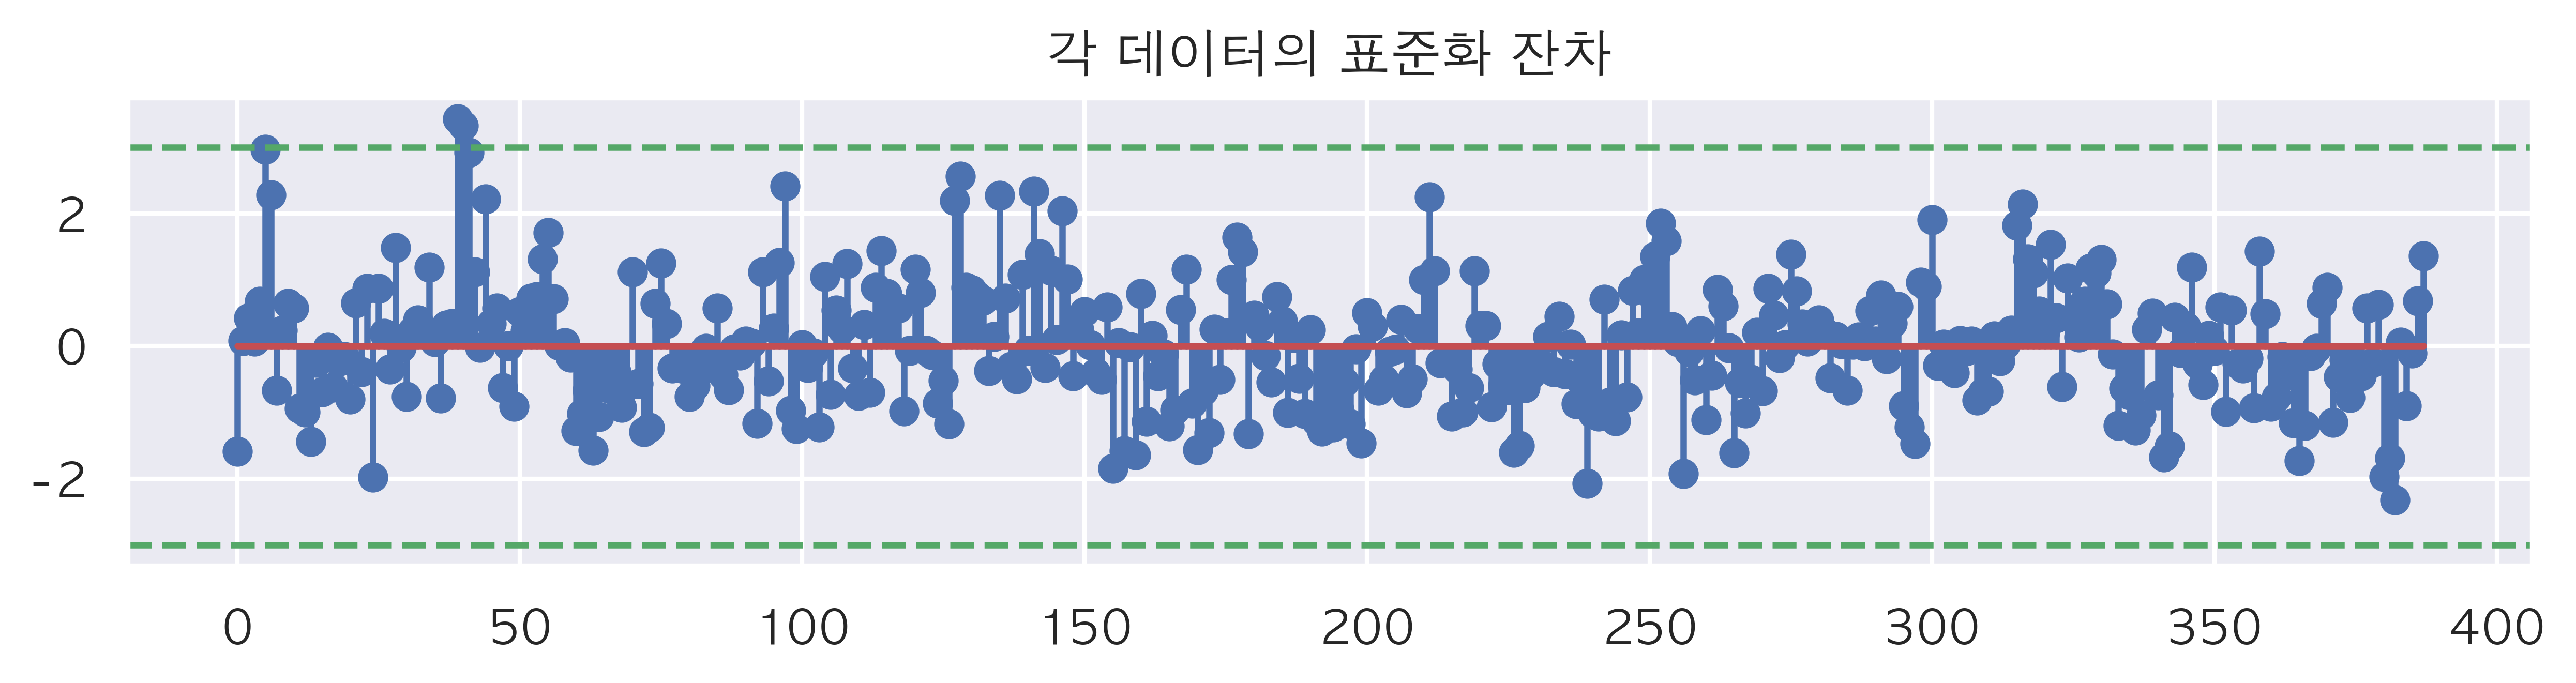

In [20]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show()

In [19]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    model = sm.OLS.from_formula(
        '로그연봉 ~ C(시즌C) +C(팀) + C(나이C):scale(횟수) + C(포지션) + scale(G) + scale(홈런) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) + scale(타율) + scale(경험)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.로그연봉 - pred) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.69435415, 검증 R2 = 0.60963801
학습 R2 = 0.69696088, 검증 R2 = 0.55276217
학습 R2 = 0.67690693, 검증 R2 = 0.66515013
학습 R2 = 0.68717379, 검증 R2 = 0.62279977
학습 R2 = 0.69018848, 검증 R2 = 0.60632880


In [53]:
# 아웃라이어 제거
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(df['OPS']) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(df))).difference(idx))
df1 = df.iloc[idx2, :].reset_index(drop=True)